In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix


In [84]:
data=pd.read_excel('Data Analyst Assignment.xlsx')

In [85]:
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         16834 non-null  object        
 8   creative_type         16834 non-null  object        
 9   creative_name         16834 non-null  object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null  float64       
 13  impressions     

In [87]:
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [88]:
data.corr()

,spends,impressions,clicks,link_clicks
spends,1.000000,0.744552,0.838371,0.697201
impressions,0.744552,1.000000,0.917512,0.963108
clicks,0.838371,0.917512,1.000000,0.925588
link_clicks,0.697201,0.963108,0.925588,1.000000


In [89]:
data.shape

(16834, 16)

In [90]:
data.isnull().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [91]:
plat_camp=data['campaign_platform'].unique()
plat_camp

array(['Google Ads', 'Facebook Ads'], dtype=object)

#### There are two diff. platform use for campaign

In [109]:

a=data.groupby('campaign_platform') 

a['campaign_platform'].describe()

,count,unique,top,freq
campaign_platform,,,,
Facebook Ads,1733,1,Facebook Ads,1733
Google Ads,15101,1,Google Ads,15101


C:\Users\Akash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Used platform')

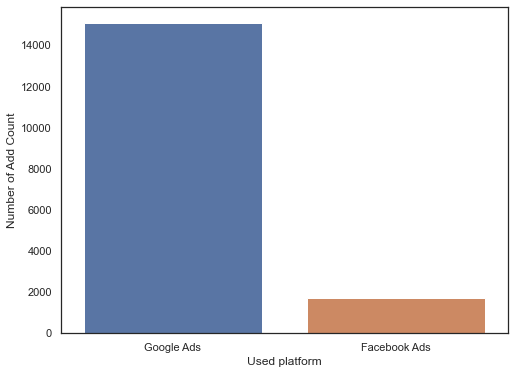

In [96]:
fig=plt.subplots(figsize=(8,6))
sns.countplot(data['campaign_platform'])
plt.ylabel('Number of Add Count')
plt.xlabel('Used platform')

From above anlysis we observed that number of campaign run on the Google ads is MORE than number of campaign run on facebook ads

### device use by viewer 

In [97]:
data.device.unique()

array(['Desktop', 'Mobile', 'Tablet', 'device'], dtype=object)

In [98]:
dev=data.groupby('device') 

dev['device'].describe()

,count,unique,top,freq
device,,,,
Desktop,6318,1,Desktop,6318
Mobile,7357,1,Mobile,7357
Tablet,1426,1,Tablet,1426
device,1733,1,device,1733


C:\Users\Akash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Name of Device ')

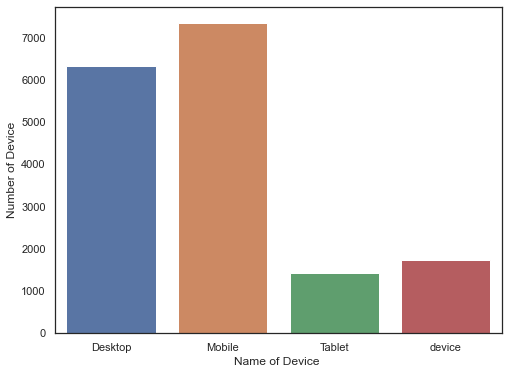

In [99]:
fig=plt.subplots(figsize=(8,6))
sns.countplot(data['device'])
plt.ylabel('Number of Device')
plt.xlabel('Name of Device ')

We have more view from Mobile And Desktop users than tablet or other users

In [110]:
agg=data.groupby('age') 

agg['age'].describe()

,count,unique,top,freq
age,,,,
18-24,2472,1,18-24,2472
25-34,3097,1,25-34,3097
35-44,2865,1,35-44,2865
45-54,2499,1,45-54,2499
55-64,1757,1,55-64,1757
65 or more,1558,1,65 or more,1558
Undetermined,2586,1,Undetermined,2586


C:\Users\Akash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Age Of Viewer')

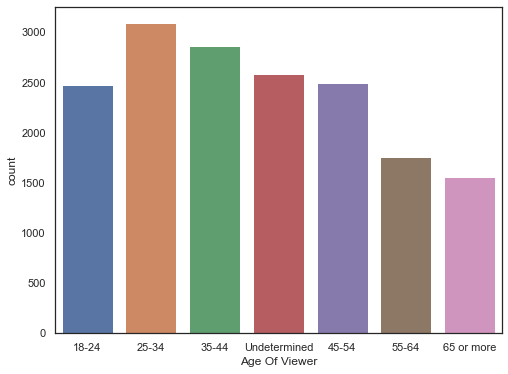

In [104]:
fig=plt.subplots(figsize=(8,6))
sns.countplot(data['age'])
plt.xlabel('Age Of Viewer')

## Analysis of other feature

In [111]:
audi_type =data.groupby('audience_type') 

audi_type['audience_type'].describe()

,count,unique,top,freq
audience_type,,,,
'-,15101,1,'-,15101
Audience 1,813,1,Audience 1,813
Audience 2,738,1,Audience 2,738
Audience 3,182,1,Audience 3,182


In [122]:
audi_type['audience_type'].unique()

audience_type
'-                    ['-]
Audience 1    [Audience 1]
Audience 2    [Audience 2]
Audience 3    [Audience 3]
Name: audience_type, dtype: object

Most of audience in dataset are unknown 

In [125]:
cre_name =data.groupby('creative_type') 

cre_name['creative_type'].describe()

,count,unique,top,freq
creative_type,,,,
'-,15101,1,'-,15101
Carousal,603,1,Carousal,603
Image,1130,1,Image,1130


In [123]:
cre_name['audience_type'].unique()

creative_name
'-                                          ['-]
Carousal    [Audience 2, Audience 3, Audience 1]
Click       [Audience 2, Audience 3, Audience 1]
Girl        [Audience 2, Audience 3, Audience 1]
Name: audience_type, dtype: object

In [113]:
cre_name =data.groupby('creative_name') 

cre_name['creative_name'].describe()

,count,unique,top,freq
creative_name,,,,
'-,15101,1,'-,15101
Carousal,603,1,Carousal,603
Click,644,1,Click,644
Girl,486,1,Girl,486


In [124]:
cre_name['creative_name'].unique()

creative_name
'-                ['-]
Carousal    [Carousal]
Click          [Click]
Girl            [Girl]
Name: creative_name, dtype: object

Most of creative type and creative name in dataset are unknown 

In [120]:
sub_ch =data.groupby('subchannel')

sub_ch['subchannel'].describe()

,count,unique,top,freq
subchannel,,,,
Brand,7853,1,Brand,7853
Competitor,2704,1,Competitor,2704
Facebook Ads,1733,1,Facebook Ads,1733
Generic,4544,1,Generic,4544


sunchannel is feature use only on google adds not in facebok adds. in googel adds we can set add based on specific words that is search keywords.


In [118]:
data['communication_medium'].describe()

count               16834
unique                  2
top       Search Keywords
freq                15101
Name: communication_medium, dtype: object

In [121]:
data['communication_medium'].unique()

array(['Search Keywords', 'Creative'], dtype=object)

In [138]:
data2 = data[['campaign_platform','age', 'spends', 'impressions', 
          'clicks', 'link_clicks']].copy()
data2['link_clicks'] = data['link_clicks'].fillna(0.0)
data2.head()

,campaign_platform,age,spends,impressions,clicks,link_clicks
0,Google Ads,18-24,0.00,2,0,0.0
1,Google Ads,25-34,0.00,5,0,0.0
2,Google Ads,35-44,0.00,1,0,0.0
3,Google Ads,Undetermined,14.63,5,3,0.0
4,Google Ads,18-24,53.31,10,2,0.0


In [139]:
le = LabelEncoder()
data2['campaign_platform'] = pd.Categorical(data2['campaign_platform'])
data2['campaign_platform'] = le.fit_transform(data2['campaign_platform'])

data2['age'] = pd.Categorical(data2['age'])
data2['age'] = le.fit_transform(data2['age'])

In [140]:
data2.head()

,campaign_platform,age,spends,impressions,clicks,link_clicks
0,1,0,0.00,2,0,0.0
1,1,1,0.00,5,0,0.0
2,1,2,0.00,1,0,0.0
3,1,6,14.63,5,3,0.0
4,1,0,53.31,10,2,0.0


In [178]:
X=data2.drop(['campaign_platform'], axis=1)
y = data2.campaign_platform
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [179]:
X_train.shape

(12625, 5)

In [190]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

clf = clf.fit(X_train,y_train)

In [191]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [194]:
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred).round(3))


Accuracy:- 0.995


In [197]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       421
           1       1.00      1.00      1.00      3788

    accuracy                           1.00      4209
   macro avg       0.99      0.98      0.99      4209
weighted avg       0.99      1.00      1.00      4209



[[ 409   12]
 [   9 3779]]


<AxesSubplot:>

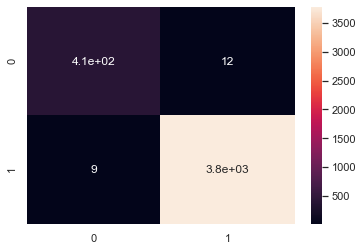

In [200]:
print(confusion_matrix(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [244]:
A=data2.drop(['campaign_platform'], axis=1)
b = data2.campaign_platform
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.25, random_state=5)

In [245]:
model= MultinomialNB()

In [246]:
clf=model.fit(A_train,b_train)


In [251]:
Y_pred=clf.predict(A_test)
Y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [252]:
print("Accuracy:",metrics.accuracy_score(b_test, Y_pred))


Accuracy: 0.9087669280114041


In [250]:
print (classification_report(b_test,Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.86      0.65       421
           1       0.98      0.91      0.95      3788

    accuracy                           0.91      4209
   macro avg       0.75      0.89      0.80      4209
weighted avg       0.94      0.91      0.92      4209



[[ 433   74]
 [ 385 4159]]


<AxesSubplot:>

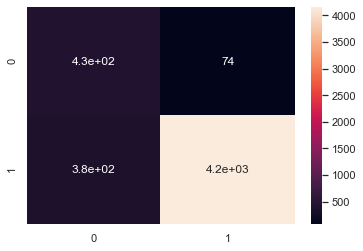

In [235]:
print(confusion_matrix(b_test,Y_pred))
sns.heatmap(confusion_matrix(b_test,Y_pred),annot=True)